In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

from pcv.welford import *


key = jax.random.PRNGKey(0)
n = 100_000_000
exponents = jnp.arange(1, 9)
means, wmeans = [], []

for i, exponent in enumerate(exponents):
    w0 = log_welford_init(shape=tuple())
    n = 10 ** exponent
    lxs = jax.random.normal(key=key, shape=(n,))
    xs = jnp.exp(lxs)
    w, _ = jax.lax.scan(
        lambda carry_w, lx: (log_welford_add(lx, carry_w), None), w0, lxs
    )
    coef = 1e8
    # we'll multiply these by 1/coef to get small numbers
    lxs = jax.random.normal(key=key, shape=(n,))  # logs
    mean_xs = jnp.mean(jnp.exp(lxs))
    small_lxs = lxs - jnp.log(coef)
    w, _ = jax.lax.scan(
        lambda carry_w, lx: (log_welford_add(lx, carry_w), None), w0, small_lxs
    )
    wlog_mean = log_welford_mean(w) + jnp.log(coef)
    means.append(mean_xs)
    wmeans.append(jnp.exp(wlog_mean))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


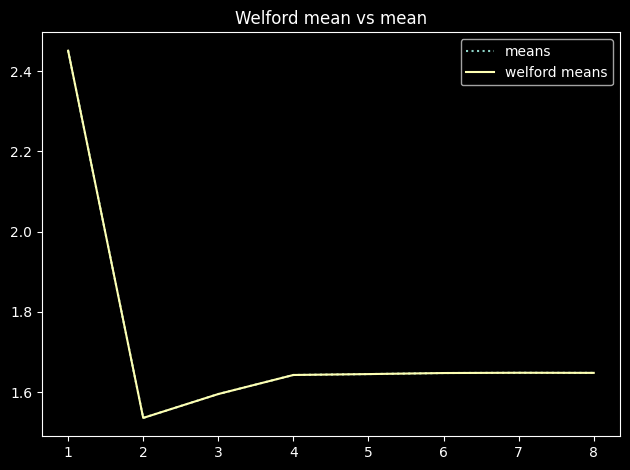

In [3]:
plt.plot(exponents, means, label="means", linestyle=':')
plt.plot(exponents, wmeans, label="welford means")
plt.title('Welford mean vs mean')
plt.legend()
plt.tight_layout()